## Import Dataset

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

directory = './AggregatedDataset'
full_dataset = []
# Import dataset
for filename in os.listdir(directory):
    print(filename)
    if filename[0] == '.':
        continue
    fileData = pd.read_csv(os.path.join(directory, filename))
    full_dataset.append(fileData)
dataset = pd.concat(full_dataset)

X = dataset.iloc[:,1:-1] # features
y = dataset.loc[:,'gestureLabel'] # labels

finalDataset_1_encoded_aggregated.csv
finalDataset_6_encoded_aggregated.csv
.DS_Store
finalDataset_5_encoded_aggregated.csv
finalDataset_8_encoded_aggregated.csv
finalDataset_2_encoded_aggregated.csv
finalDataset_3_encoded_aggregated.csv
finalDataset_4_encoded_aggregated.csv
finalDataset_7_encoded_aggregated.csv
finalDataset_0_encoded_aggregated.csv


## Split Dataset into Train, Test, Validation

In [ ]:
from sklearn.model_selection import train_test_split

# Train data + Validation data = 90%, Test data = 10%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

## Decision Tree

In [ ]:
import csv
from sklearn.tree import DecisionTreeClassifier
from collections import defaultdict
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

# Below are hyperparamters that we will be exploring in the decision tree
hyperparameters = {'criterion': ['gini', 'entropy', 'log_loss'],
                   'max_depth': [i for i in range(10, 25)]}

dtree_classifier = DecisionTreeClassifier()

# Perform a grid search with cross-validation
grid_search = GridSearchCV(dtree_classifier, param_grid=hyperparameters, cv=2, scoring='accuracy')

# Fit the grid search to the dataset
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best parameters: {}".format(grid_search.best_params_))
print("Best score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'criterion': 'log_loss', 'max_depth': 19}
Best score: 0.86


## Mean and STD

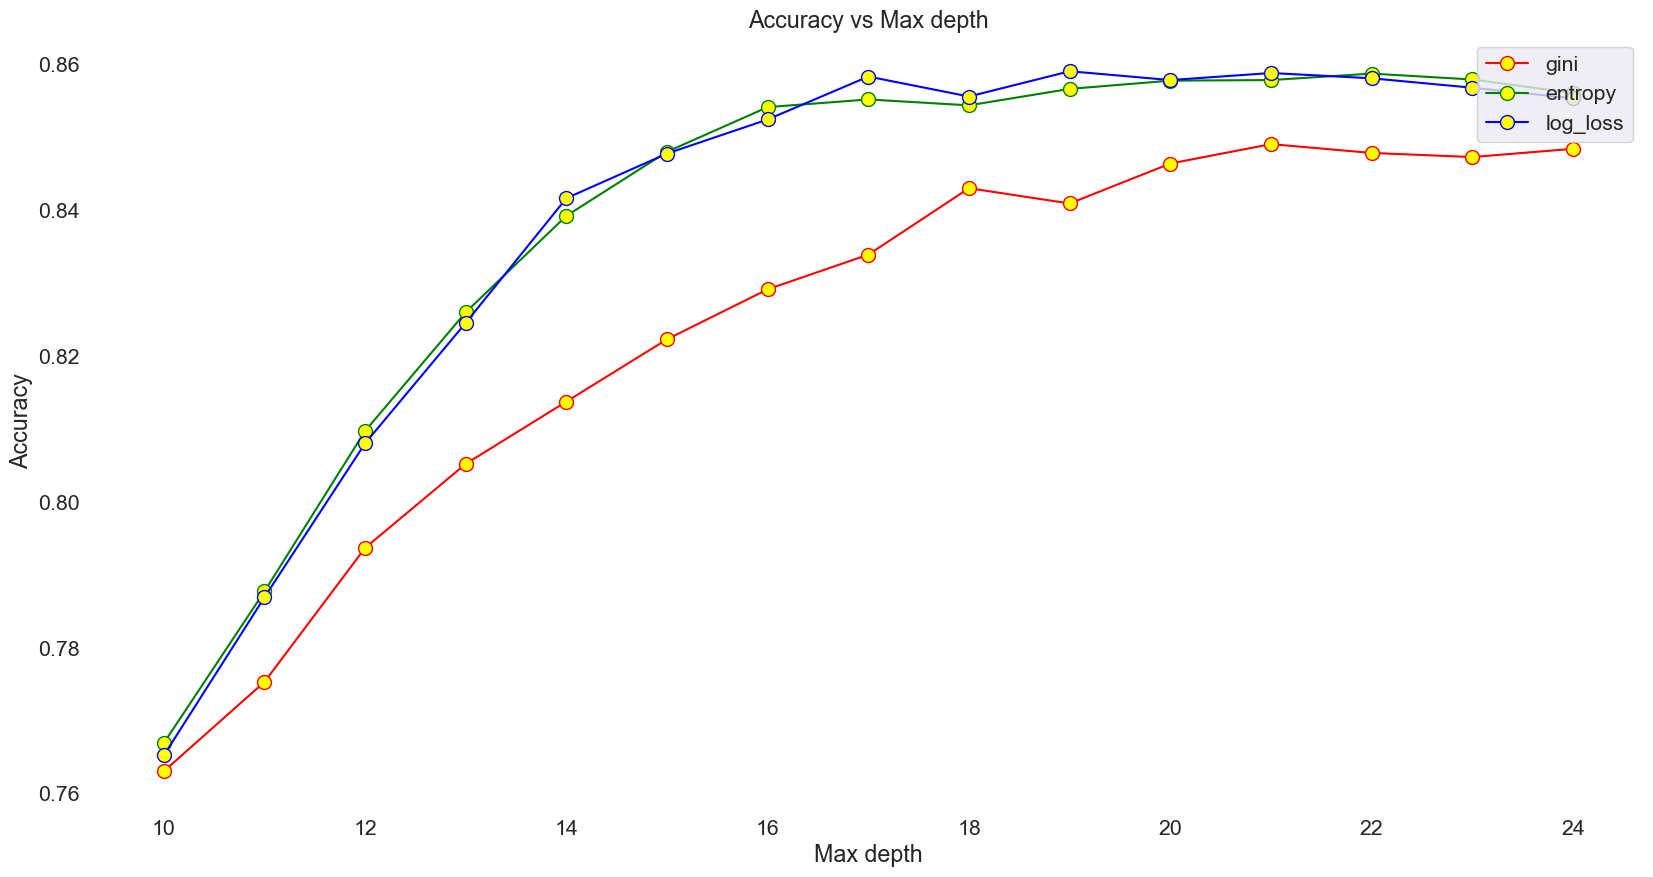

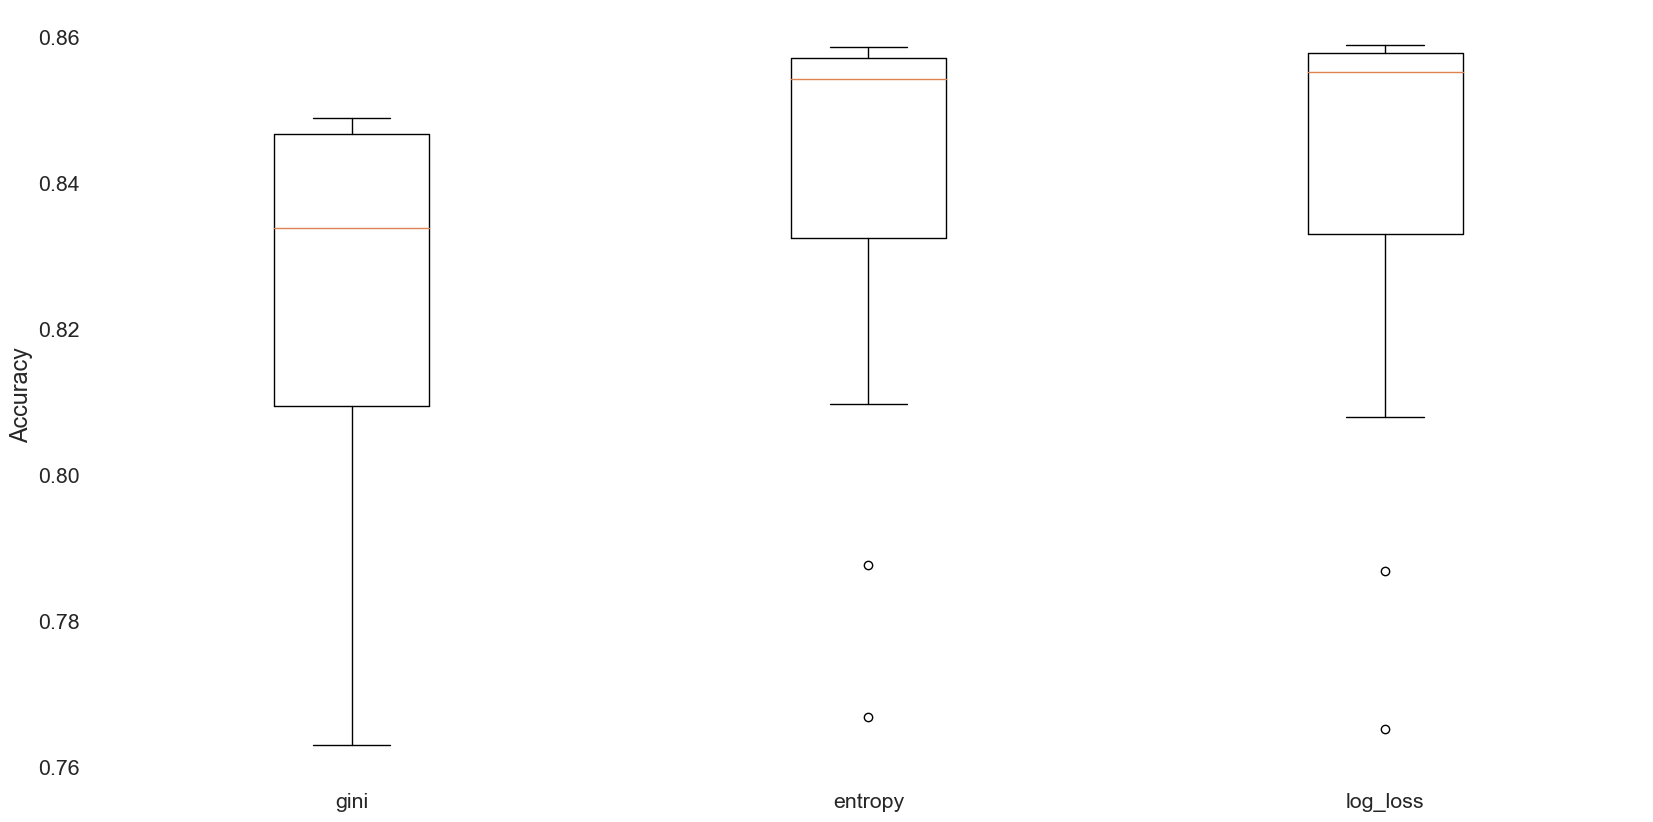

In [ ]:
result_dict = defaultdict(list)
cv_results = grid_search.cv_results_
for mean_score, std_score, params in zip(cv_results["mean_test_score"], cv_results["std_test_score"], cv_results["params"]):
    result_dict[params['criterion']].append(mean_score)

plt.figure(figsize=(20,10))
plt.plot(range(10,25), result_dict['gini'], color='red', linestyle='solid', marker='o', markerfacecolor='yellow', markersize=10)
plt.plot(range(10,25), result_dict['entropy'], color='green', linestyle='solid', marker='o', markerfacecolor='yellow', markersize=10)
plt.plot(range(10,25), result_dict['log_loss'], color='blue', linestyle='solid', marker='o', markerfacecolor='yellow', markersize=10)
plt.legend(['gini', 'entropy', 'log_loss'], loc="upper right")
plt.gca().set_facecolor("none")
plt.title('Accuracy vs Max depth')
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

# Plot Box and Whiskers (for criterion)
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
plt.boxplot(list(result_dict.values()))
plt.ylabel('Accuracy')
ax.set_xticklabels(list(result_dict))
plt.gca().set_facecolor("none")
plt.show()



## Classification Report

In [ ]:
gestureLabels = ['Elbow Flexion Left', 'Elbow Flexion Right', 'Shoulder Flexion Left', 'Shoulder Flexion Right', 'Shoulder Abduction Left', 'Shoulder Abduction Right', 'Shoulder Forward Elevation', 'Side Tap Left', 'Side Tap Rigtht']

acc = classification_report(y_test, grid_search.predict(X_test), target_names=gestureLabels)
print(acc)

                            precision    recall  f1-score   support

        Elbow Flexion Left       0.86      0.85      0.86       135
       Elbow Flexion Right       0.84      0.87      0.85       134
     Shoulder Flexion Left       0.84      0.87      0.85       166
    Shoulder Flexion Right       0.88      0.89      0.89       136
   Shoulder Abduction Left       0.90      0.95      0.92       172
  Shoulder Abduction Right       0.97      0.89      0.93       164
Shoulder Forward Elevation       0.99      0.97      0.98       174
             Side Tap Left       0.87      0.89      0.88       132
           Side Tap Rigtht       0.91      0.88      0.90       167

                  accuracy                           0.90      1380
                 macro avg       0.90      0.90      0.90      1380
              weighted avg       0.90      0.90      0.90      1380



## Confusion Matrix

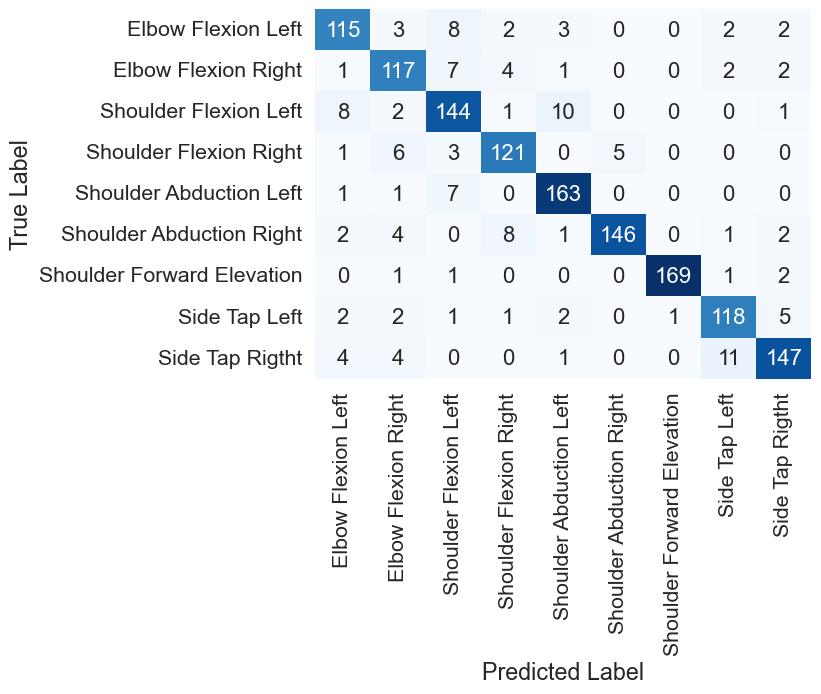

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

label_map = {0: gestureLabels[0],
             1: gestureLabels[1],
             2: gestureLabels[2],
             3: gestureLabels[3],
             4: gestureLabels[4],
             5: gestureLabels[5],
             6: gestureLabels[6],
             7: gestureLabels[7],
             8: gestureLabels[8]}
labels = [label_map[i] for i in range(len(label_map))]
# Create example confusion matrix
cm = confusion_matrix(y_test, grid_search.predict(X_test))

# Plot confusion matrix as heatmap
sns.set(font_scale=1.4) # Adjust font size
sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap="Blues", fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)

# Set plot labels
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()